# Overview

Given the Ames Housing data, predict the final price of each home

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

In [46]:
#Importing data

house_data = pd.read_csv("./AmesHousing.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
data_w = house_data.copy()

data_w.columns = data_w.columns.str.replace(" ", "")

data_w.info

<bound method DataFrame.info of       Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0         1  526301100          20       RL        141.0    31770   Pave   
1         2  526350040          20       RH         80.0    11622   Pave   
2         3  526351010          20       RL         81.0    14267   Pave   
3         4  526353030          20       RL         93.0    11160   Pave   
4         5  527105010          60       RL         74.0    13830   Pave   
...     ...        ...         ...      ...          ...      ...    ...   
2925   2926  923275080          80       RL         37.0     7937   Pave   
2926   2927  923276100          20       RL          NaN     8885   Pave   
2927   2928  923400125          85       RL         62.0    10441   Pave   
2928   2929  924100070          20       RL         77.0    10010   Pave   
2929   2930  924151050          60       RL         74.0     9627   Pave   

     Alley LotShape LandContour  ... PoolArea PoolQC  F

In [47]:
data_w.head()

Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0      1  526301100          20       RL        141.0    31770   Pave   NaN   
1      2  526350040          20       RH         80.0    11622   Pave   NaN   
2      3  526351010          20       RL         81.0    14267   Pave   NaN   
3      4  526353030          20       RL         93.0    11160   Pave   NaN   
4      5  527105010          60       RL         74.0    13830   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold  \
0      IR1         Lvl  ...        0    NaN    NaN         NaN       0      5   
1      Reg         Lvl  ...        0    NaN  MnPrv         NaN       0      6   
2      IR1         Lvl  ...        0    NaN    NaN        Gar2   12500      6   
3      Reg         Lvl  ...        0    NaN    NaN         NaN       0      4   
4      IR1         Lvl  ...        0    NaN  MnPrv         NaN       0      3   

  YrSold SaleType  SaleCondition  SalePrice  
0   2010      WD          Normal     215000  
1   2010      WD          Normal     105000  
2   2010      WD          Normal     172000  
3   2010      WD          Normal     244000  
4   2010      WD          Normal     189900  

[5 rows x 82 columns]



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


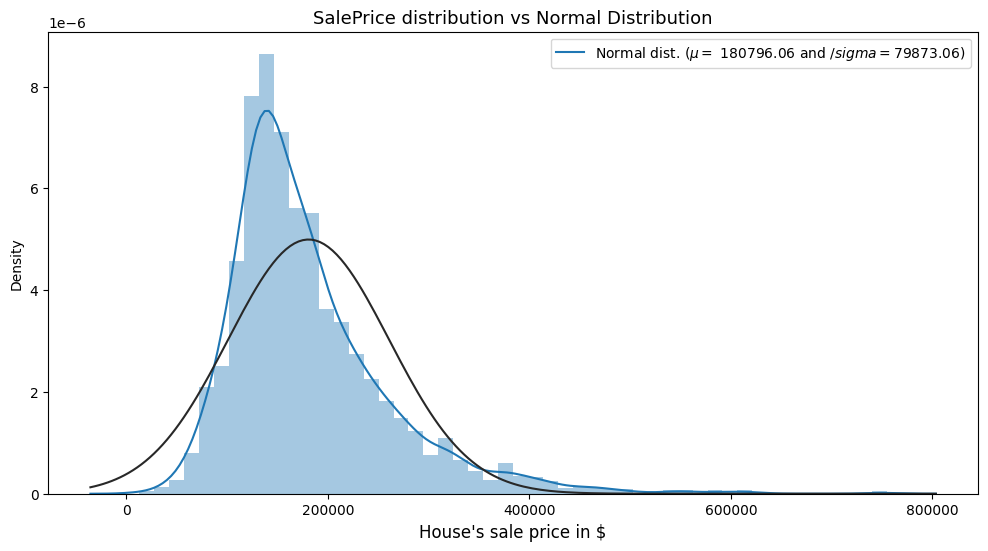

In [48]:
#Exploratory Data Analysis and Visualisation

(mu, sigma) = norm.fit(data_w["SalePrice"])
plt.figure(figsize = (12,6))

sns.distplot(data_w["SalePrice"],fit=norm)

plt.title("SalePrice distribution vs Normal Distribution", fontsize = 13)
plt.xlabel("House's sale price in $", fontsize = 12)
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $/sigma=${:.2f})".format(mu, sigma)], loc = "best")
plt.show()

In [49]:
#Correlation



# What does this mean? Google it

In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we'll deal with that later in the notebook.


In [50]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.743500
Kurtosis: 5.118900
Shapiro_Test: 0.876261
Shapiro_Test: 0.000000


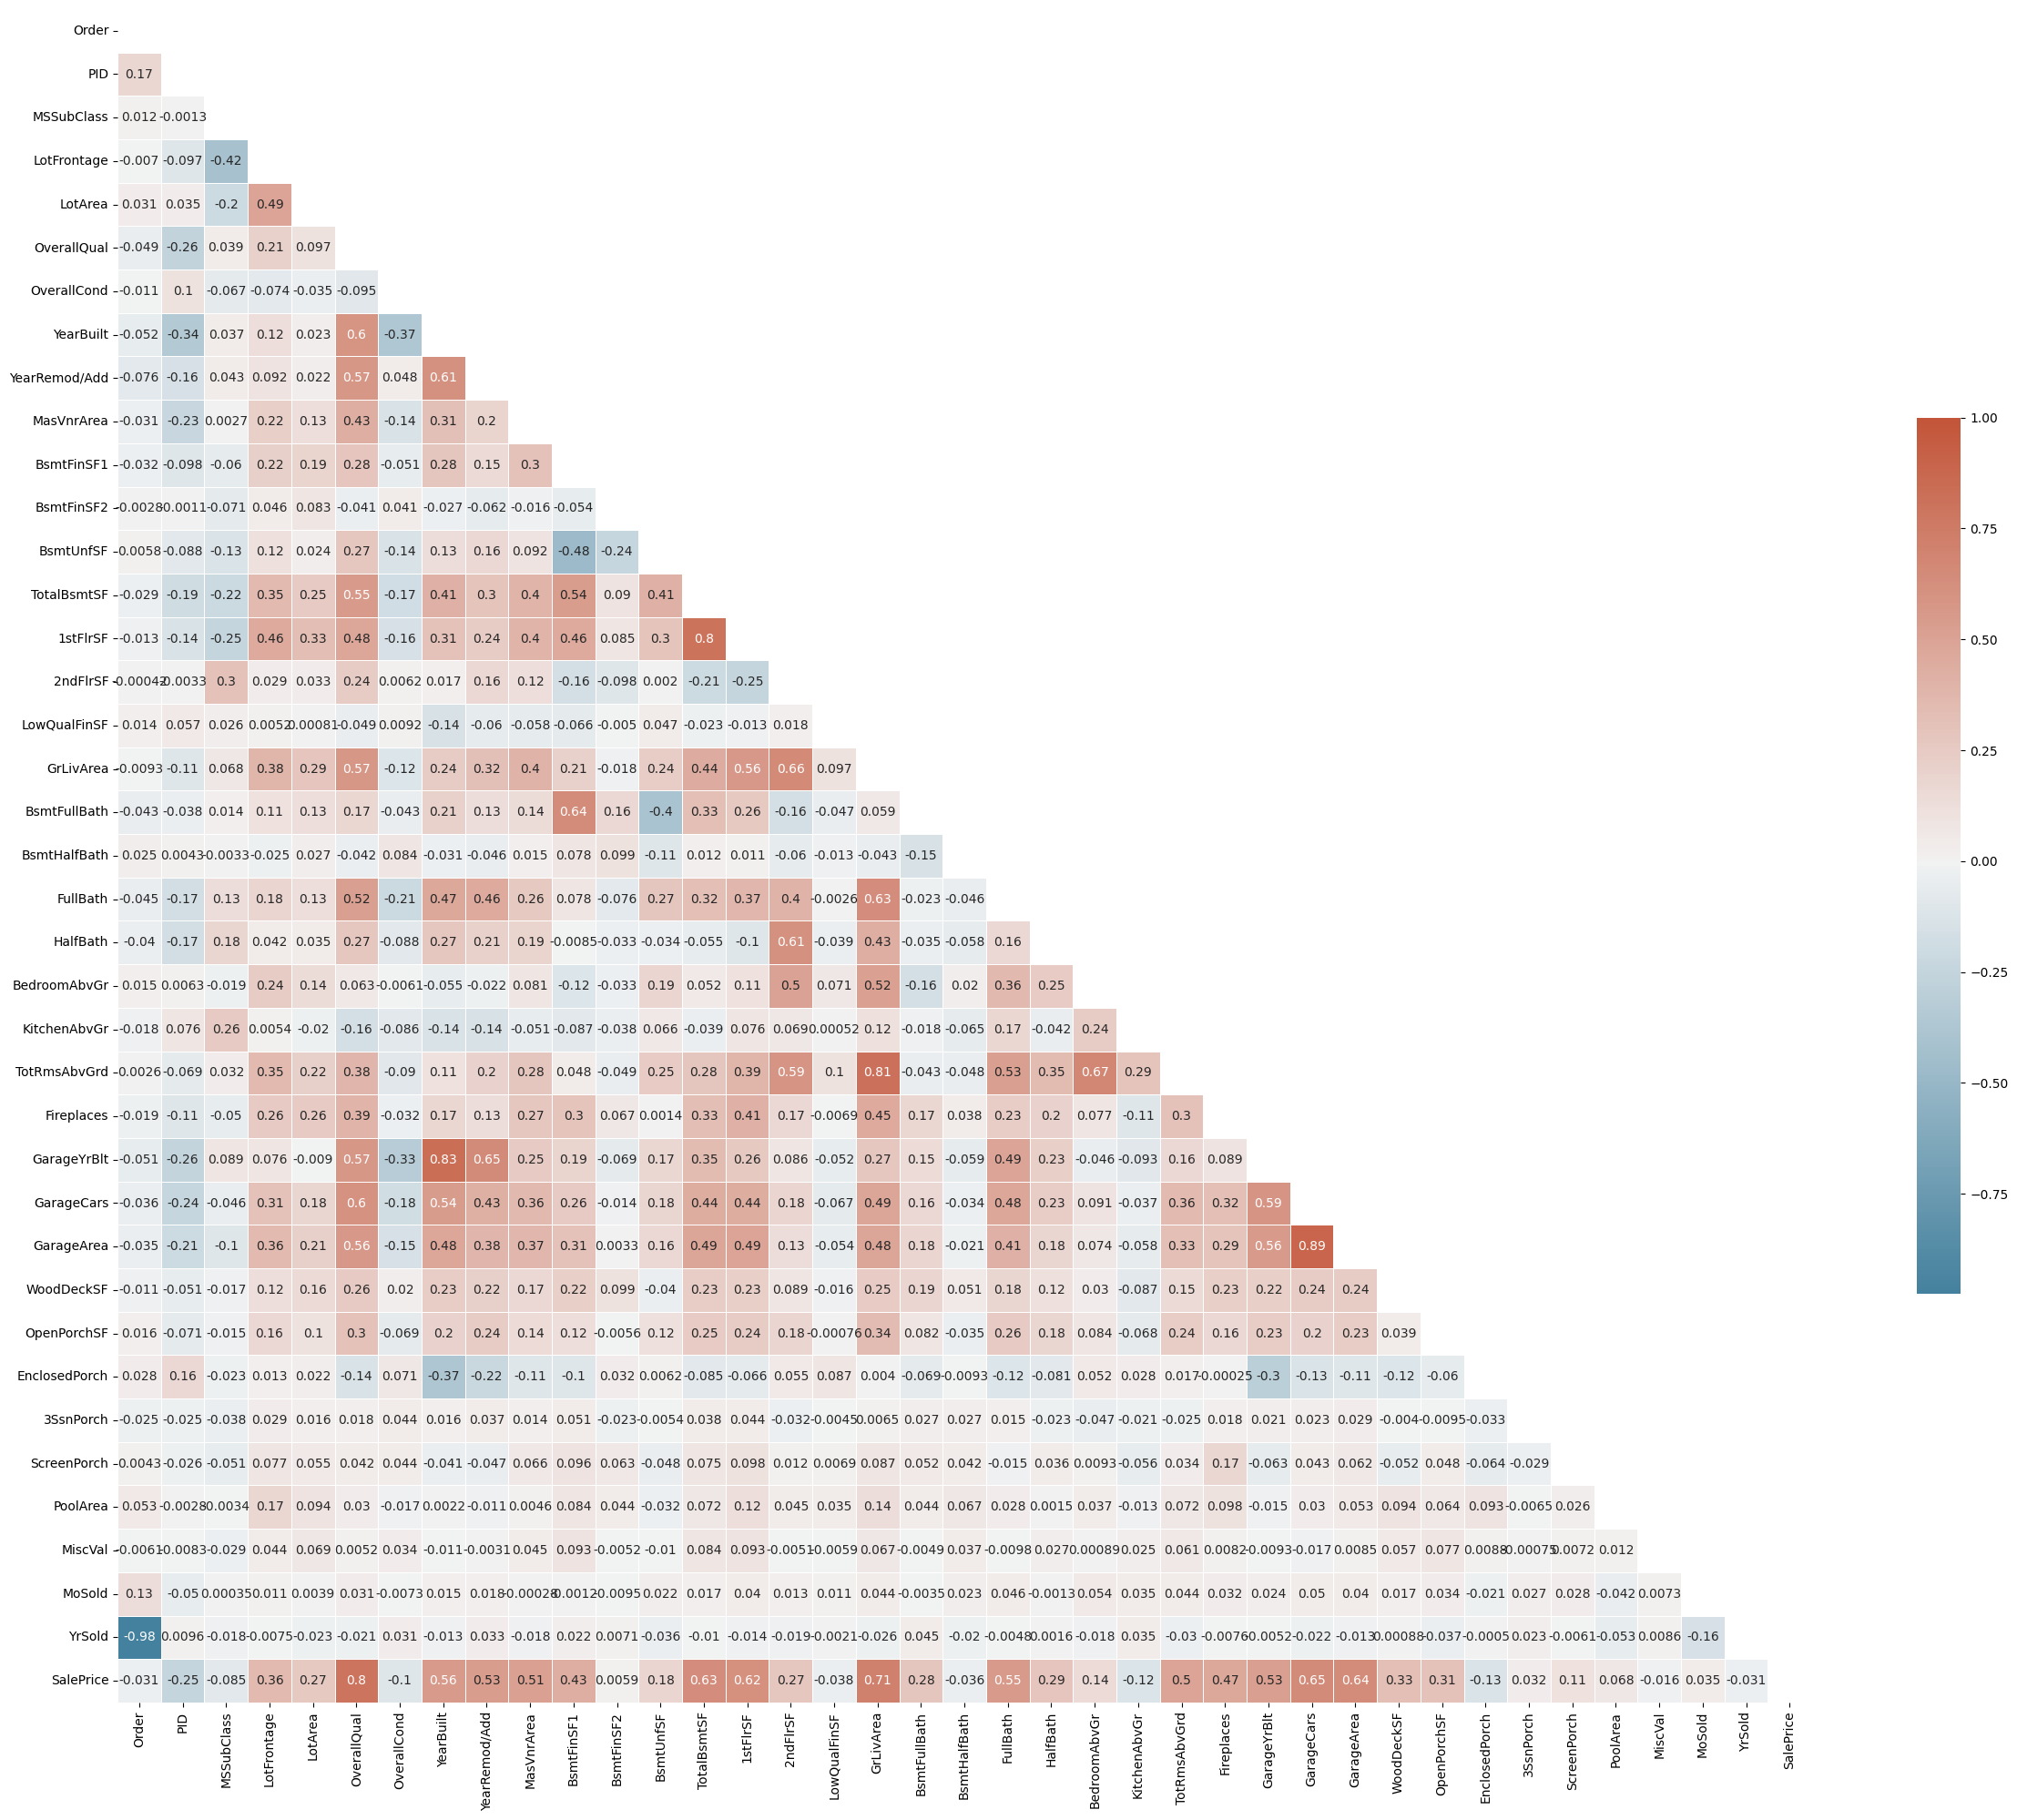

In [51]:
#Correlation Matrix


f, ax = plt.subplots(figsize=(30, 25))
numeric_data = data_w.select_dtypes(include=['number'])
mat = numeric_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From this, we can find which features correlates the most with the target, and then can investigate more in depth.

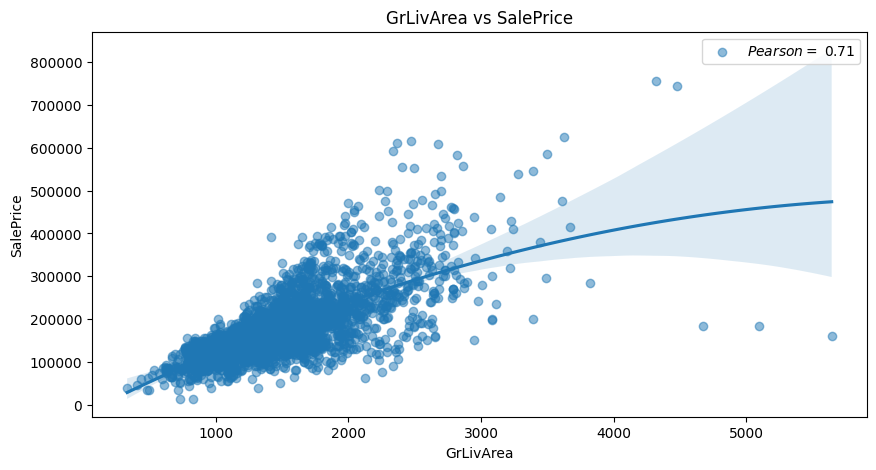

In [52]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (10,5))
sns.regplot(data=data_w, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.5}, order =2 )
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

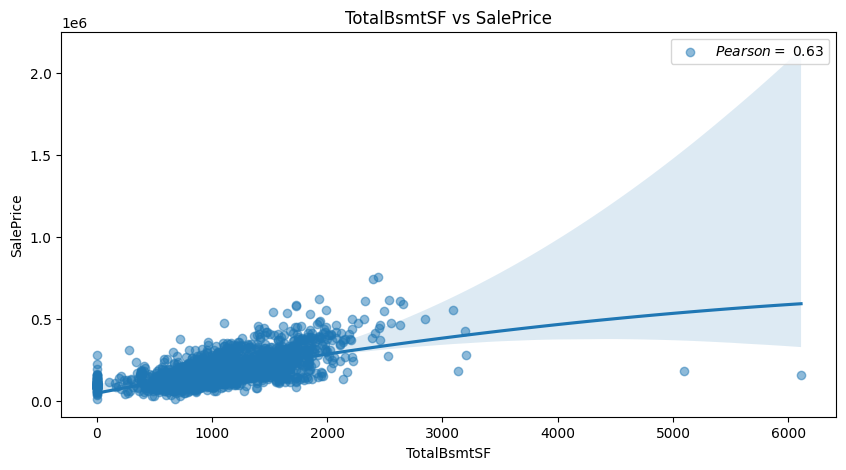

In [53]:
Pearson_TBSF = 0.63
plt.figure(figsize = (10,5))
sns.regplot(data = data_w, x = "TotalBsmtSF", y = "SalePrice", scatter_kws={"alpha": 0.5}, order =2 )
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

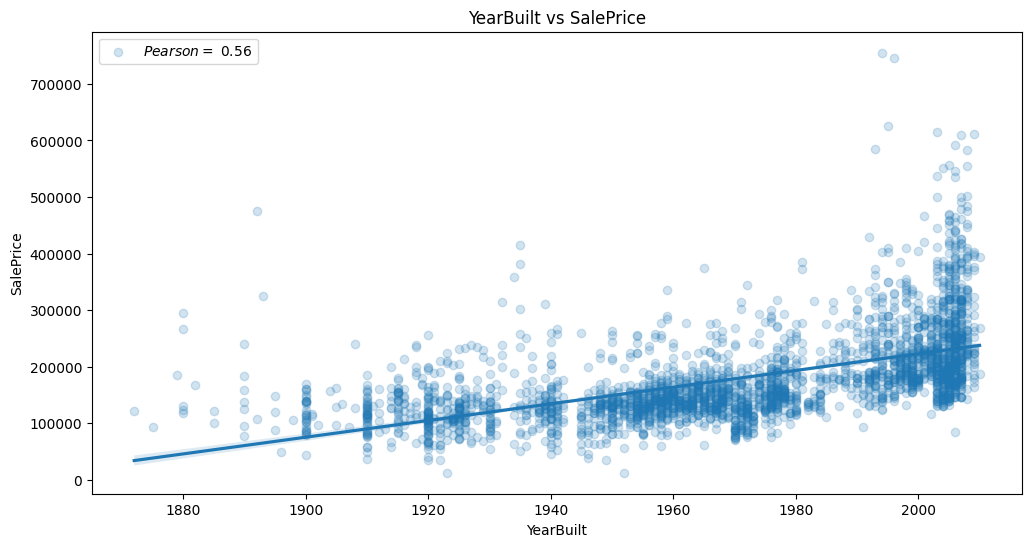

In [54]:
Pearson_YrBelt = 0.56
plt.figure(figsize=(12,6))
sns.regplot(data=data_w, x = "YearBuilt", y="SalePrice", scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBelt)], loc = 'best')
plt.show()

# Data Processing

After finding the useful attributes, they need  to be preprocessed so that they can be used for modeling.

Main steps of preprocessing are:

1. Looking for potential NaN
2. Dealing with categorical features (e.g. Dummy coding?)
3. Normalisation

In [55]:
#Separating Target and Features
#Try and do this, but with only training and testing data. Try and omit the main Housing AMV data stuff
target =data_w['SalePrice']
test_id = test['Id']
#test = pd.read_csv("./test.csv")
test = test.drop(['Id'], axis = 1)
data_w2 = data_w.drop(['SalePrice','PID','Order'], axis=1)

#Concateenating train & trst set

train_test = pd.concat([data_w2,test], axis=0, sort=False)


In [56]:


# Looking at NaN % within the data
# This is quite useful, remember how to do this!

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan



NaN_sum           feat     Perc(%) Usability
Exterior1st          1    Exterior1st    0.068493      Keep
Exterior2nd          1    Exterior2nd    0.068493      Keep
KitchenQual          1    KitchenQual    0.068493      Keep
Electrical           1     Electrical    0.068493      Keep
SaleType             1       SaleType    0.068493      Keep
TotalBsmtSF          2    TotalBsmtSF    0.136986      Keep
GarageArea           2     GarageArea    0.136986      Keep
GarageCars           2     GarageCars    0.136986      Keep
Utilities            2      Utilities    0.136986      Keep
Functional           2     Functional    0.136986      Keep
BsmtUnfSF            2      BsmtUnfSF    0.136986      Keep
BsmtFinSF1           2     BsmtFinSF1    0.136986      Keep
BsmtFinSF2           2     BsmtFinSF2    0.136986      Keep
BsmtHalfBath         4   BsmtHalfBath    0.273973      Keep
BsmtFullBath         4   BsmtFullBath    0.273973      Keep
MSZoning             4       MSZoning    0.273973      Keep
MasVnrArea          38     MasVnrArea    2.602740      Keep
BsmtFinType1       122   BsmtFinType1    8.356164      Keep
BsmtFinType2       123   BsmtFinType2    8.424658      Keep
BsmtQual           124       BsmtQual    8.493151      Keep
BsmtCond           125       BsmtCond    8.561644      Keep
BsmtExposure       127   BsmtExposure    8.698630      Keep
GarageType         233     GarageType   15.958904      Keep
GarageCond         237     GarageCond   16.232877      Keep
GarageQual         237     GarageQual   16.232877      Keep
GarageFinish       237   GarageFinish   16.232877      Keep
GarageYrBlt        237    GarageYrBlt   16.232877      Keep
LotFrontage        717    LotFrontage   49.109589   Discard
YearRemod/Add     1459  YearRemod/Add   99.931507   Discard
FireplaceQu       2152    FireplaceQu  147.397260   Discard
MasVnrType        2669     MasVnrType  182.808219   Discard
YearRemodAdd      2930   YearRemodAdd  200.684932   Discard
Fence             3527          Fence  241.575342   Discard
Alley             4084          Alley  279.726027   Discard
MiscFeature       4232    MiscFeature  289.863014   Discard
PoolQC            4373         PoolQC  299.520548   Discard

In [57]:
# Converting non-numeric predictors stored as numbers into string
# But what is this for exactly?

for col in ['MSSubClass','YrSold','MoSold']:
    train_test[col] = train[col].apply(str)

# Filling Categorical NaN (That we know how to fill due to the description file )
# What does this do? How does it work?
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")

for col in ['Exterior1st','Exterior2nd','SaleType']:
    train_test[col] = train_test[col].fillna(train_test[col].mode()[0])

for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature']:
    train_test[col] = train_test[col].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    60
0    60
Name: MSSubClass, dtype: object
0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0      NaN
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    1960.0
0    1961.0
Name: GarageYrBlt, dtype: float64
0    2
0    2
Name: MoSold, dtype: object
0    2008
0    2008
Name: YrSold, dtype: object
0       NaN
0    1961.0
Name: YearRemodAdd, dtype: float64


In [58]:
# Removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna(subset=[col])          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        # use the elbow technique to go and find out the number of neighbours to use. Migt not be 5
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])     #1st arg provies the features, 2nd arg is the target.
        #Revise K neighbours to get a better understanding as to how this works!
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

# Note that this is using K neighbours to fill up missing data, quite cool
train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print("NaN present")
        print(train_test[col][0])

# Feature Engineering

This is the part where new features are created by combining the ones we already have. This could help to increase the performance of the model if we can create a feature that is highly correlated to the Sales Price

In [59]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into string
# This is dont to make it clear that they are categorical variables, and would not be interpreted as ordinal variables which would lead to incorrect results
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features
# Creates new columns and fills up with 1s or 0s, based on the category it has.
train_test_dummy = pd.get_dummies(train_test)
#But how to tell if the feature engineering will actually help?
# Fetch all numeric features

#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
#features with high skewness are likely to have more pronounced asymmetry in their distributions
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
print("high Skew: ", high_skew)

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

high Skew:  KitchenQual_Po         66.226884
Utilities_NoSeWa       66.226884
Exterior2nd_Other      66.226884
MiscFeature_TenC       66.226884
RoofMatl_Metal         66.226884
                         ...    
Exterior2nd_VinylSd     0.639652
BsmtFullBath            0.628481
Exterior1st_VinylSd     0.628079
Total_Bathrooms         0.561452
OverallCond             0.532256
Length: 306, dtype: float64




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


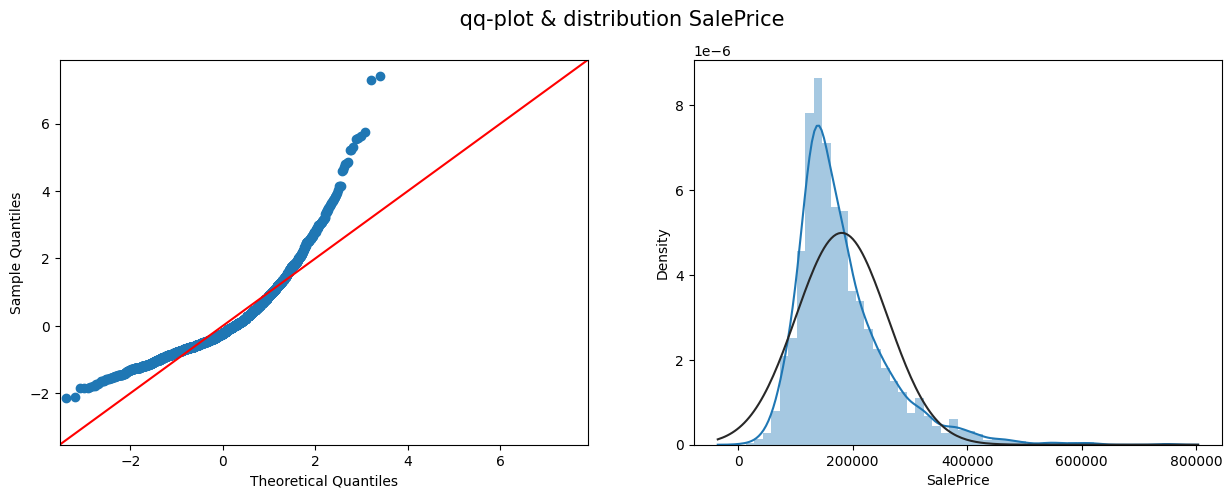

In [60]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
#I need to do furhter research into this, chatGPT isn't enough
sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])



sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


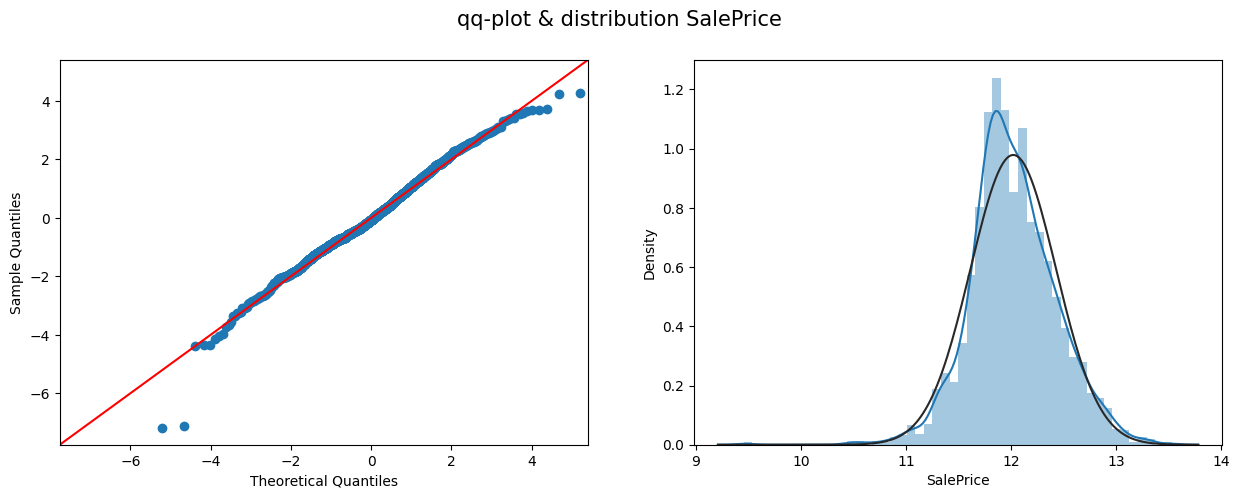

In [61]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

#Check for skewness after doing log transformation

# Modelling Section

In [62]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
 #Learn all of these packages!


In [63]:
# Train-Test separation

train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test['Id'] = test_id

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.',
                   'Dec_Tree_Reg.','Random_Forest_Reg.',
                   'Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

# l_gbm = LGBMRegressor(objective='regression')
# score_l_gbm = cv_rmse(l_gbm)
# cv_scores.append(score_l_gbm.mean())
# cv_std.append(score_l_gbm.std())

# Support Vector Regression

# svr = SVR()
# score_svr = cv_rmse(svr)
# cv_scores.append(score_svr.mean())
# cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

# xgb = xgb.XGBRegressor()
# score_xgb = cv_rmse(xgb)
# cv_scores.append(score_xgb.mean())
# cv_std.append(score_xgb.std())

# Gradient Boost Regressor

# gbr = GradientBoostingRegressor()
# score_gbr = cv_rmse(gbr)
# cv_scores.append(score_gbr.mean())
# cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                         ),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

KeyboardInterrupt: 

In [ ]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0          Linear_Reg.   0.141301  0.021699
1  Bayesian_Ridge_Reg.   0.122115  0.019212
2        Dec_Tree_Reg.   0.192536  0.019600
3   Random_Forest_Reg.   0.136993  0.012640
4       Cat_Boost_Reg.   0.113539  0.016918
5         Stacked_Reg.   0.117242  0.017970

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


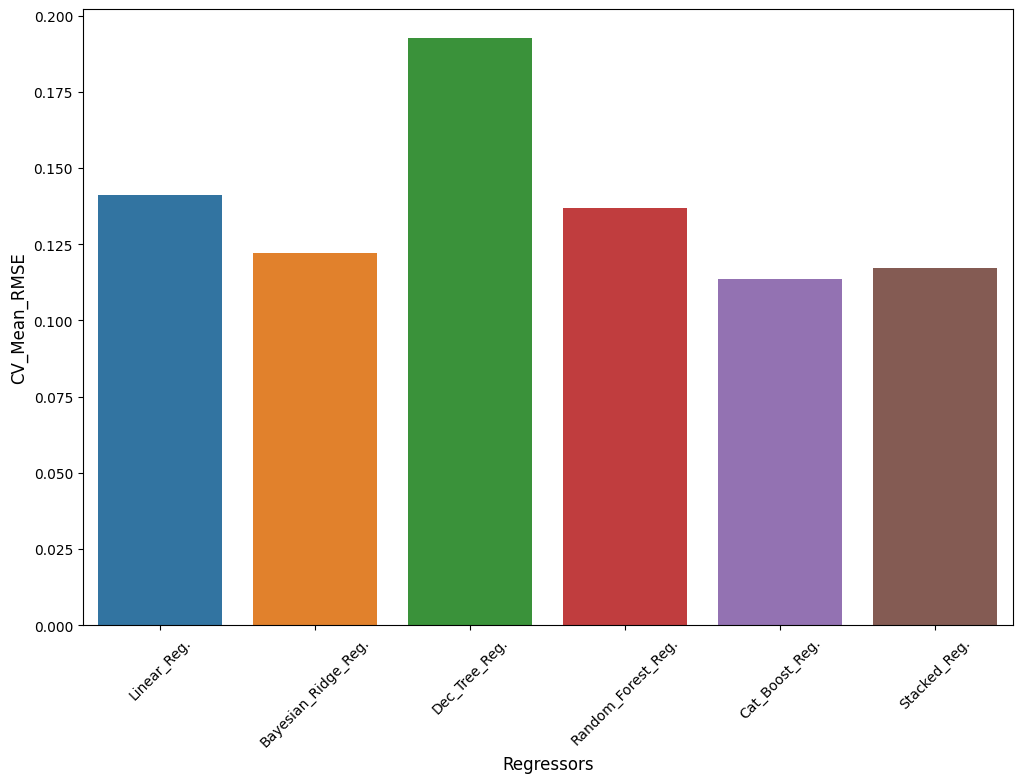

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = final_cv_score['Regressors'],y = final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

0.09325431042731504

In [ ]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0           OverallQual    15.478232
1            HighQualSF     9.332743
2             YearBuilt     7.773644
3    Total_Home_Quality     7.512296
4           TotalBsmtSF     7.157644
..                  ...          ...
351    MiscFeature_Gar2     0.000000
352    MiscFeature_TenC     0.000000
353        SaleType_CWD     0.000000
354        SaleType_Con     0.000000
355         SaleType_WD     0.000000

[356 rows x 2 columns]

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


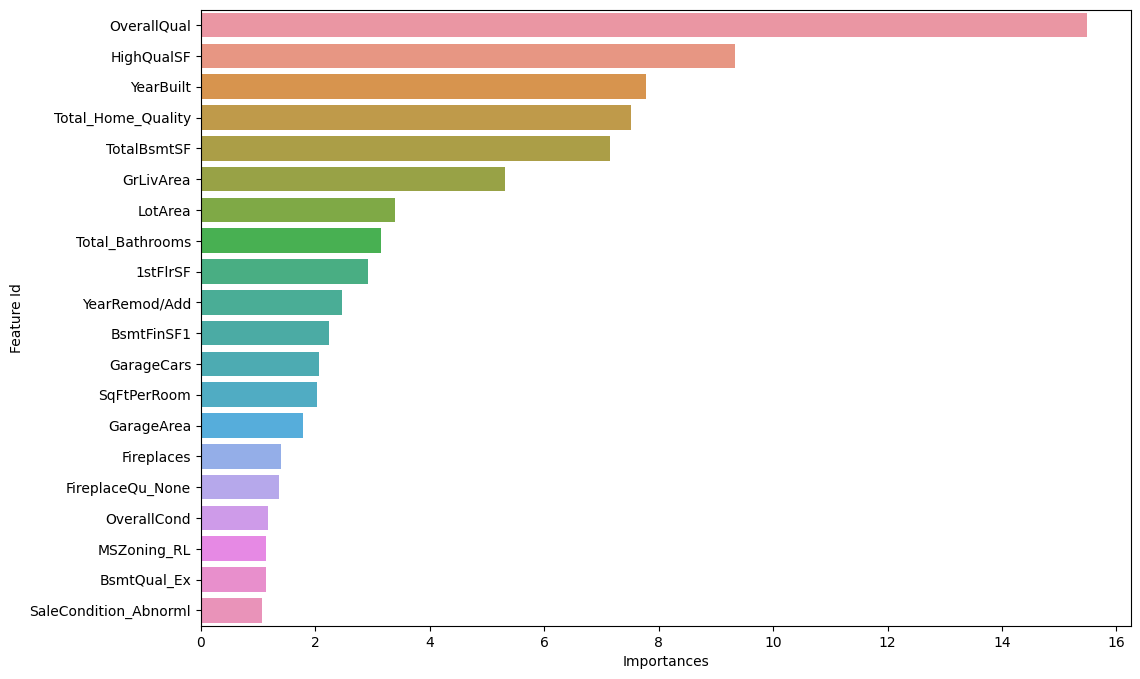

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x= feat_imp['Importances'][:20],y = feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [ ]:


# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)



feature1            feature2  importance
0   OverallQual          BsmtFinSF1    0.534749
1   OverallQual          HighQualSF    0.510898
2   OverallQual       YearRemod/Add    0.440424
3       LotArea           YearBuilt    0.422036
4     YearBuilt  Total_Home_Quality    0.394725
5       LotArea         SqFtPerRoom    0.387989
6       LotArea  Total_Home_Quality    0.369508
7   OverallQual         TotalBsmtSF    0.352780
8   OverallQual    Condition2_Feedr    0.339975
9     YearBuilt          HighQualSF    0.318956
10  TotalBsmtSF          HighQualSF    0.308453
11    YearBuilt         TotalBsmtSF    0.306158
12    YearBuilt           GrLivArea    0.303910
13  OverallQual  Total_Home_Quality    0.302615
14      LotArea          GarageArea    0.302226
15      LotArea         OverallQual    0.300903
16  OverallQual           GrLivArea    0.285161
17    YearBuilt         SqFtPerRoom    0.271248
18  TotalBsmtSF           GrLivArea    0.268419
19      LotArea           GrLivArea    0.266141

In [ ]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.0164660	test: 12.0164383	best: 12.0164383 (0)	total: 9.86ms	remaining: 9.85s
1:	learn: 12.0104873	test: 12.0104568	best: 12.0104568 (1)	total: 15.5ms	remaining: 7.71s
2:	learn: 12.0045220	test: 12.0044888	best: 12.0044888 (2)	total: 20.8ms	remaining: 6.92s
3:	learn: 11.9985573	test: 11.9985338	best: 11.9985338 (3)	total: 28.9ms	remaining: 7.18s
4:	learn: 11.9925877	test: 11.9925668	best: 11.9925668 (4)	total: 37.7ms	remaining: 7.5s
5:	learn: 11.9866232	test: 11.9865919	best: 11.9865919 (5)	total: 45.5ms	remaining: 7.54s
6:	learn: 11.9806511	test: 11.9806132	best: 11.9806132 (6)	total: 54.1ms	remaining: 7.67s
7:	learn: 11.9746702	test: 11.9746329	best: 11.9746329 (7)	total: 56ms	remaining: 6.95s
8:	learn: 11.9687096	test: 11.9686753	best: 11.9686753 (8)	total: 65.5ms	remaining: 7.21s
9:	learn: 11.9627482	test: 11.9627166	best: 11.9627166 (9)	total: 77ms	remaining: 7.63s
10:	learn: 11.9567926	test: 11.9567758	best: 11.9567758 (10)	total: 89.1ms	remaining: 8.01s
11:	learn: 11

In [ ]:
randomized_search_result

{'params': {'depth': 6,
  'l2_leaf_reg': 9,
  'iterations': 6000,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:


# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 6,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:


catf_score



0.09430034307286964

In [72]:
target

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [73]:
# Test CSV Submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

Id      SalePrice  Real SalePrice
0  1461  120440.744027          215000
1  1462  161500.127398          105000
2  1463  183420.255110          172000
3  1464  195111.547248          244000
4  1465  188896.971995          189900

In [74]:
# Saving the results in a csv file

submission.to_csv("result.csv", index = False, header = True)